# **Data Understanding**

In [1]:
import pandas as pd

In [74]:
df = pd.read_csv('recuirement_data.csv')
df

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,SkillScore,PersonalityScore,RecruitmentStrategy,Decision
0,26,Female,Bachelor's,0,3,26.783828,78,91,Aggressive,Potential
1,39,Female,PhD,12,3,25.862694,68,80,Moderate,Potential
2,48,Male,Bachelor's,3,2,9.920805,67,13,Moderate,Not Potential
3,34,Female,Bachelor's,5,2,6.407751,27,70,Conservative,Not Potential
4,30,Male,Diploma's,6,1,43.105343,52,85,Moderate,Not Potential
...,...,...,...,...,...,...,...,...,...,...
1495,48,Male,Bachelor's,3,4,9.183783,3,80,Conservative,Potential
1496,27,Female,Bachelor's,10,3,14.847731,97,7,Moderate,Not Potential
1497,24,Female,Diploma's,1,2,4.289911,91,58,Aggressive,Potential
1498,48,Male,Bachelor's,4,4,36.299263,37,44,Moderate,Potential


### Attribute Information

| Atribut | Tipe Data | Deskripsi |
| --- | --- | --- |
| Age | Integer | Umur Kandidat |
| Gender | Integer | Jenis Kelamin Kandidat |
| EducationLevel | Integer | Tingkat pendidikan tertinggi yang dicapai oleh kandidat |
| ExperienceYears | Integer | Jumlah tahun pengalaman profesional |
| PreviousCompanies | Integer | Jumlah perusahaan sebelumnya tempat kandidat bekerja |
| DistanceFromCompany | Float | Jarak dalam kilometer dari tempat tinggal kandidat ke perusahaan perekrutan |
| SkillScore | Integer | Skor penilaian keterampilan teknis kandidat |
| PersonalityScore | Integer | Skor evaluasi ciri-ciri kepribadian kandidat |
| RecruitmentStrategy | Integer | Strategi yang diadopsi oleh tim perekrutan untuk perekrutan |
| Decision | Integer | Hasil keputusan perekrutan |




In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   object 
 2   EducationLevel       1500 non-null   object 
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   SkillScore           1500 non-null   int64  
 7   PersonalityScore     1500 non-null   int64  
 8   RecruitmentStrategy  1500 non-null   object 
 9   Decision             1500 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 117.3+ KB


# **Exploratory Data Analysis (EDA)**

In [20]:
#Mengimpor library 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(color_codes=True)

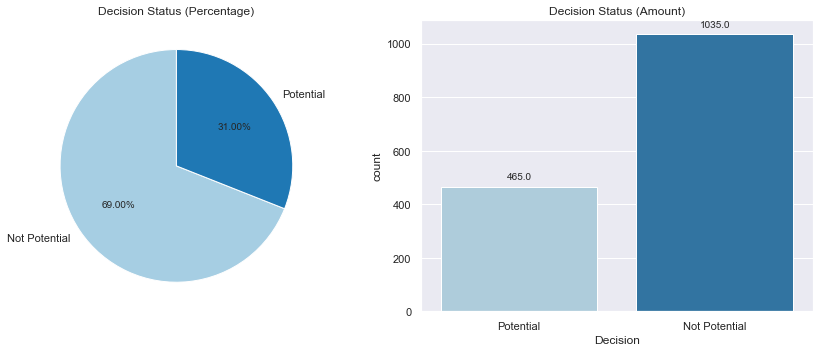

In [32]:
#Membuat subplots dengan ukuran 1 baris 2 kolom
fig, axs = plt.subplots(1,2, figsize=(12,5))

#Membuat pie chart untuk memvisualisasikan persentase pegawai yang diekrut dengan yang tidak
axs[0].pie(df['Decision'].value_counts().values, labels=df['Decision'].value_counts().index, startangle=90, autopct='%1.2f%%',colors=sns.color_palette("Paired"))
axs[0].set_title("Decision Status (Percentage)")

#Membuat bar chart untuk memvisualisasikan jumlah pegawai yang diekrut dengan yang tidak
sns.countplot(x=df['Decision'], palette='Paired', ax=axs[1])
axs[1].set_title("Decision Status (Amount)")
for p in axs[1].patches:
    axs[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', 
    xytext = (0, 10), textcoords = 'offset points')

#Menampilkan visualisasi
plt.tight_layout()
plt.show()

**Analisis:**

Dataset ini menunjukkan **ketidakseimbangan kelas**, di mana calon karyawan yang **potensial** berjumlah **465 (sekitar 31%)** dibandingkan dengan calon karyawan yang **tidak potensial** berjumlah **1035 (atau 69%)**. Rendahnya jumlah calon karyawan yang potensial ini dapat memengaruhi analisis dan pengambilan keputusan dalam proses rekrutmen. Oleh karena itu, penting untuk menerapkan strategi penanganan agar model prediksi tidak bias dan hasilnya mencerminkan realitas secara akurat dengan **Handling Imbalance Data**

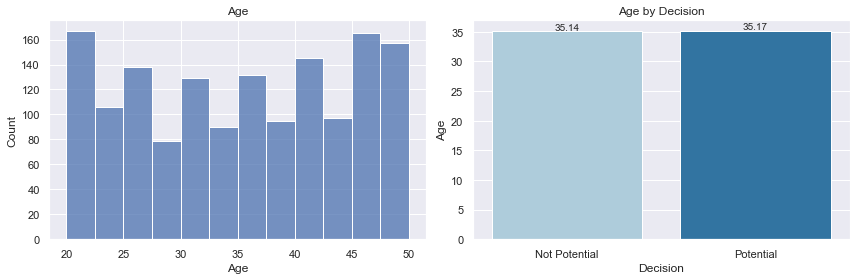

In [35]:
#Membuat subplots yang berisi 1 baris 2 kolom
fig, axs = plt.subplots(1,2, figsize=(12,4))

#Membuat visualisasi histogram untuk menggambarkan persebaran data age
sns.histplot(x=df['Age'], ax=axs[0], palette='Paired')
axs[0].set_title("Age")

#Membuat visualisasi barplot untuk menggambarkan perbedaan rata-rata umur pada pegawai yang direkrut dengan yang tidak
age = df.groupby("Decision")['Age'].mean().reset_index()
sns.barplot(data=age, x="Decision", y="Age", ax=axs[1], palette='Paired')
axs[1].set_title("Age by Decision")
for i in range(age.shape[0]):
    axs[1].text(i, age['Age'][i] + 0.2, round(age['Age'][i], 2), ha='center')

#Menampilkan visualisasi
plt.tight_layout()
plt.show()

**Analisis:**

Output di atas menunjukkan distribusi umur pegawai dan rata-rata umur berdasarkan status decision. Visualisasi histogram menunjukkan bahwa pegawai berusia **antara 20 hingga 50 tahun**, sementara barchart di sebelah kanan mengindikasikan bahwa tidak ada perbedaan umur yang signifikan antara pegawai yang direkrut dan yang tidak. **Temuan ini menyoroti bahwa umur tidak berpengaruh terhadap status perekrutan**, memberikan wawasan penting untuk mempertimbangkan faktor lain dalam proses rekrutmen.

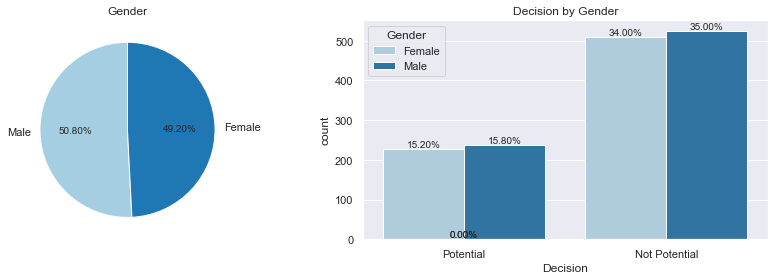

In [46]:
#Menghitung jumlah pekerja berdasarkan jenis kelamin
gender = df['Gender'].value_counts()

#Membuat pie chart untuk memvisualisasikan persentase pegawai berdasarkan jenis kelamin
fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].pie(gender.values, labels=gender.index, autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Paired"))
axs[0].set_title("Gender")

#Membuat visualisasi countplot untuk menggambarkan perbedaan status pegawai berdasarkan jenis kelamin
sns.countplot(x=df['Decision'], hue=df['Gender'], ax=axs[1], palette='Paired')
axs[1].set_title("Decision by Gender")
total_counts = df['Decision'].value_counts().sum()
for p in axs[1].patches:
    percentage = f'{100 * p.get_height() / total_counts:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axs[1].text(x, y, percentage, ha='center', va='bottom')

#Menampilkan hasil visualisasi
plt.tight_layout()
plt.show()

**Analisis:**

Hasil di atas menunjukkan bahwa 50,8% pegawai berjenis kelamin laki-laki dan 49,2% perempuan. **Tidak ada perbedaan signifikan dalam status perekrutan antara calon karyawan yang potensial dan yang tidak**, seperti yang terlihat pada persentase dalam bar chart di atas.

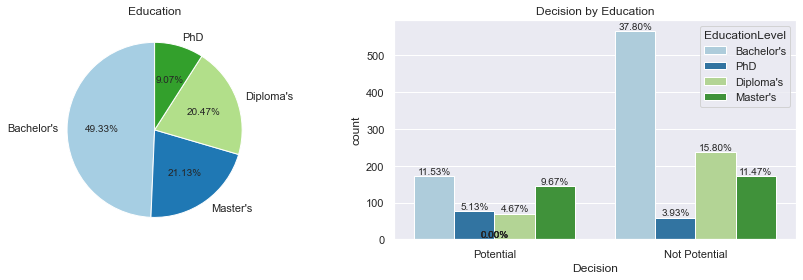

In [49]:
#Menghitung jumlah pekerja berdasarkan tingkat pendidikan
edu = df['EducationLevel'].value_counts()

#Membuat pie chart untuk memvisualisasikan persentase pegawai berdasarkan tingkat pendidikan
fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].pie(edu.values, labels=edu.index, autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Paired"))
axs[0].set_title("Education")

#Membuat visualisasi count untuk menggambarkan perbedaan status pegawai berdasarkan tingkat pendidikan
sns.countplot(x=df['Decision'], hue=df['EducationLevel'], ax=axs[1], palette='Paired')
axs[1].set_title("Decision by Education")
total_counts = df['Decision'].value_counts().sum()
for p in axs[1].patches:
    percentage = f'{100 * p.get_height() / total_counts:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axs[1].text(x, y, percentage, ha='center', va='bottom')

#Menampilkan hasil visualisasi
plt.tight_layout()
plt.show()

**Analisis:**

Mayoritas pegawai memiliki pendidikan Bachelor's sebesar 49,33%, disusul Master's (21,13%), Diploma's (20,47%), dan Ph.D. (9,07%). **Sebagian besar yang pontesial berasal dari pendidikan Bachelor's sebesar 11,53% dan Master's (9,67%)**, menunjukkan perbedaan yang cukup signifikan pada calon karyawan yang potensial.

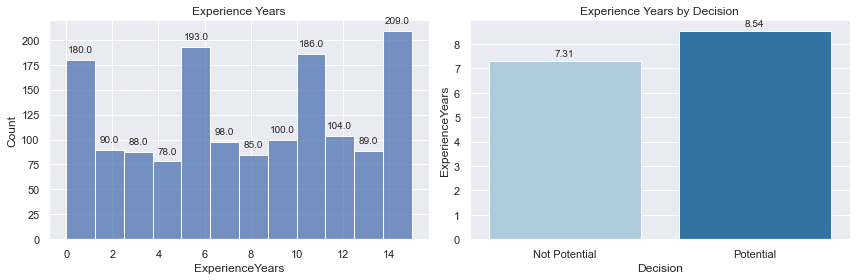

In [51]:
#Membuat subplots yang berisi 1 baris 2 kolom
fig, axs = plt.subplots(1,2, figsize=(12,4))

#Membuat visualisasi histogram untuk menggambarkan persebaran data experience
sns.histplot(x=df['ExperienceYears'], ax=axs[0], palette='Paired')
axs[0].set_title("Experience Years")
for p in axs[0].patches:
    axs[0].annotate(format(p.get_height(), '.1f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

#Membuat visualisasi barplot untuk menggambarkan perbedaan status pegawai berdasarkan experience
exp = df.groupby("Decision")['ExperienceYears'].mean().reset_index()
sns.barplot(data=exp, x="Decision", y="ExperienceYears", ax=axs[1], palette='Paired')
axs[1].set_title("Experience Years by Decision")
for i in range(age.shape[0]):
    axs[1].text(i, exp['ExperienceYears'][i] + 0.2, round(exp['ExperienceYears'][i], 2), ha='center')

#Menampilkan visualisasi
plt.tight_layout()
plt.show()

In [52]:
df['ExperienceYears'].value_counts().reset_index().sort_values(by='ExperienceYears', ascending=False)

,ExperienceYears,count
0,15,106
3,14,103
10,13,89
1,12,104
12,11,86
5,10,100
4,9,100
13,8,85
7,7,98
9,6,89


**Analisis:**

Pengalaman pegawai berkisar antara **0 hingga 15 tahun**, dengan pegawai terbanyak memiliki pengalaman **14-15 tahun sebanyak 209 pegawai**. Bar chart menunjukkan perbedaan rata-rata yang signifikan antara pegawai yang direkrut dan yang tidak. **Calon karyawan yang potensial memiliki rata-rata pengalaman 8,54 tahun, sementara pegawai yang tidak potensial hanya 7,31 tahun**.

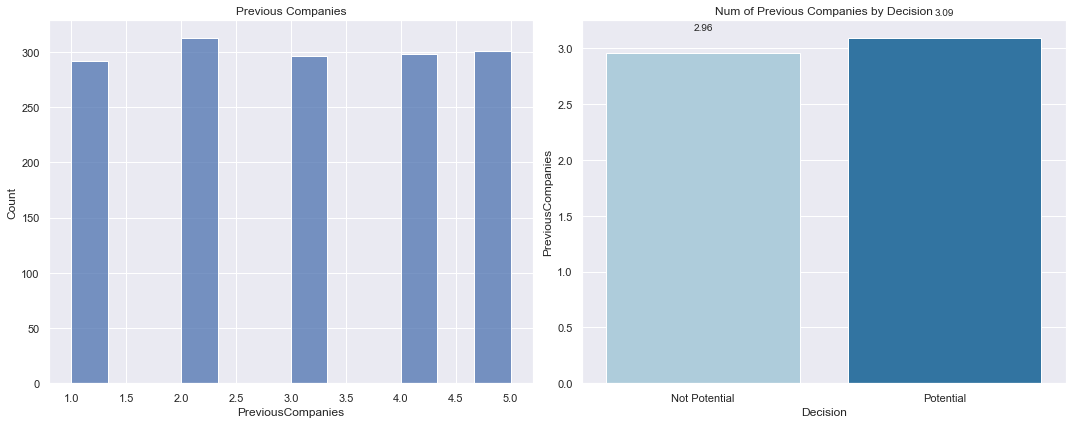

In [64]:
#Membuat subplots yang berisi 1 baris 2 kolom
fig, axs = plt.subplots(1,2, figsize=(15,6))

#Membuat visualisasi histogram untuk menggambarkan persebaran data previous companies
sns.histplot(x=df['PreviousCompanies'], ax=axs[0], palette='Paired')
axs[0].set_title("Previous Companies")

#Membuat visualisasi barplot untuk menggambarkan perbedaan status pegawai berdasarkan previous companies
prev = df.groupby("Decision")['PreviousCompanies'].mean().reset_index()
sns.barplot(data=prev, x="Decision", y="PreviousCompanies", ax=axs[1], palette='Paired')
axs[1].set_title("Num of Previous Companies by Decision")
for i in range(age.shape[0]):
    axs[1].text(i, prev['PreviousCompanies'][i] + 0.2, round(prev['PreviousCompanies'][i], 2), ha='center')

#Menampilkan visualisasi
plt.tight_layout()
plt.show()

**Analisis:**

Data Previous companies menunjukkan jumlah perusahaan tempat pegawai sebelumnya bekerja, dengan histogram mengindikasikan rentang **antara 1 hingga 5 perusahaan**. **Dari barplot, dapat disimpulkan bahwa pegawai yang direkrut cenderung memiliki pengalaman bekerja di lebih banyak perusahaan**.

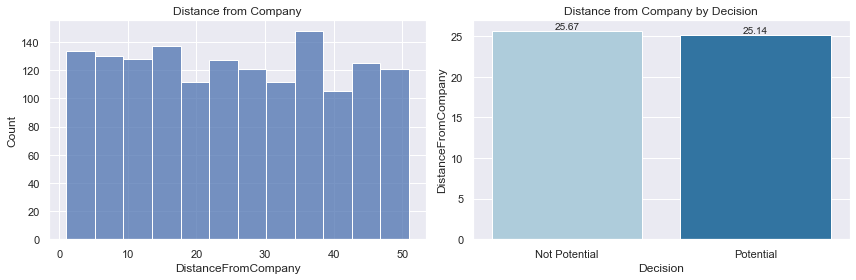

In [55]:
#Membuat subplots yang berisi 1 baris 2 kolom
fig, axs = plt.subplots(1,2, figsize=(12,4))

#Membuat visualisasi histogram untuk menggambarkan persebaran data distance from company
sns.histplot(x=df['DistanceFromCompany'], ax=axs[0], palette='Paired')
axs[0].set_title("Distance from Company")

#Membuat visualisasi barplot untuk menggambarkan perbedaan status pegawai berdasarkan distance from company
dist = df.groupby("Decision")['DistanceFromCompany'].mean().reset_index()
sns.barplot(data=dist, x="Decision", y="DistanceFromCompany", ax=axs[1], palette='Paired')
axs[1].set_title("Distance from Company by Decision")
for i in range(age.shape[0]):
    axs[1].text(i, dist['DistanceFromCompany'][i] + 0.2, round(dist['DistanceFromCompany'][i], 2), ha='center')

#Menampilkan visualisasi
plt.tight_layout()
plt.show()

**Analisis:**

Histogram menunjukkan bahwa jarak tempat tinggal pegawai dengan perusahaan bervariasi antara **0 hingga 50 kilometer**. Rata-rata jarak menunjukkan tidak ada perbedaan signifikan; **calon karyawan potensial memiliki rata-rata jarak 25,14 kilometer**, sedangkan **calon karyawan yang tidak potensial sedikit lebih jauh dengan rata-rata 25,67 kilometer**.

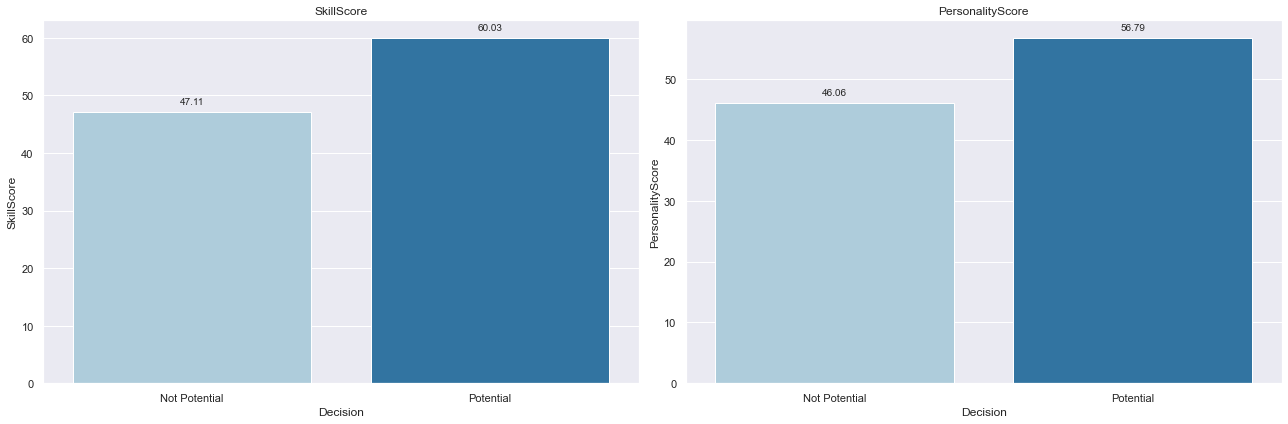

In [58]:
#Mengumplkan semua data score
score = ['SkillScore', 'PersonalityScore']

#Membuat subplots berisi 1 baris 2 kolom
fig, axs = plt.subplots(1,2, figsize=(18,6))

#Loop melalui setiap kolom score dan plot histogram
for i,col in enumerate(score):
    data = df.groupby('Decision')[col].mean().reset_index()
    sns.barplot(data=data, x='Decision', y=col, ax=axs[i], palette='Paired')
    axs[i].set_title(col)
    for p in axs[i].patches:
        axs[i].annotate(format(p.get_height(), '.2f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 10), 
                        textcoords='offset points')
    
#Menampilkan visualisasi
plt.tight_layout()
plt.show()

**Analisis:**

Output di atas menunjukkan skor skill, dan personality berdasarkan status pontesial. Terdapat perbedaan signifikan, di mana **calon karyawan potensial memiliki skor rata-rata yang lebih tinggi**: **60,03** untuk skill, dan **56,79** untuk personality. Hasil ini menyimpulkan bahwa skor pegawai dapat memengaruhi keputusan perekrutan.

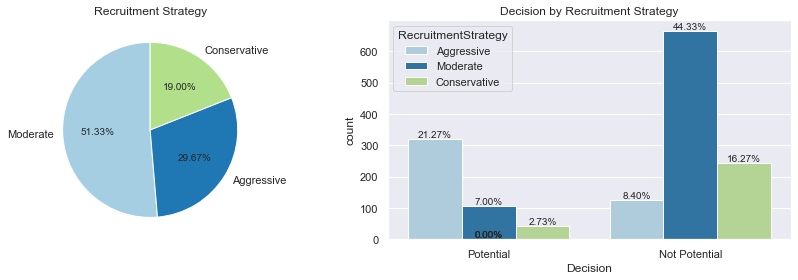

In [60]:
#Menghitung jumlah pekerja berdasarkan recruitment strategy
rec = df['RecruitmentStrategy'].value_counts()

#Membuat pie chart untuk memvisualisasikan persentase pegawai berdasarkan recruitment strategy
fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].pie(rec.values, labels=rec.index, autopct='%1.2f%%', startangle=90,colors=sns.color_palette("Paired"))
axs[0].set_title("Recruitment Strategy")

#Membuat visualisasi count untuk menggambarkan perbedaan status pegawai berdasarkan recruitment strategy
sns.countplot(x=df['Decision'], hue=df['RecruitmentStrategy'], ax=axs[1], palette='Paired')
axs[1].set_title("Decision by Recruitment Strategy")
total_counts = df['Decision'].value_counts().sum()
for p in axs[1].patches:
    percentage = f'{100 * p.get_height() / total_counts:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axs[1].text(x, y, percentage, ha='center', va='bottom')

#Menampilkan hasil visualisasi
plt.tight_layout()
plt.show()

# **Data Preprocessing**

## Encoder Feature

In [81]:
# Gender
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

#Education
education_mapping = {
    "Diploma's": 1,
    "Bachelor's": 2,
    "Master's": 3,
    "PhD": 4
}
df['EducationLevel'] = df['EducationLevel'].replace(education_mapping)

#Recruitment Strategy
strategy_mapping = {
    'Aggressive': 1,
    'Moderate': 2,
    'Conservative': 3
}
df['RecruitmentStrategy'] = df['RecruitmentStrategy'].replace(strategy_mapping)

#Decision
df['Decision'] = df['Decision'].replace({'Not Potential': 0, 'Potential': 1})

In [82]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,SkillScore,PersonalityScore,RecruitmentStrategy,Decision
0,26,1,2,0,3,26.783828,78,91,1,1
1,39,1,4,12,3,25.862694,68,80,2,1
2,48,0,2,3,2,9.920805,67,13,2,0
3,34,1,2,5,2,6.407751,27,70,3,0
4,30,0,1,6,1,43.105343,52,85,2,0


## Korelasi

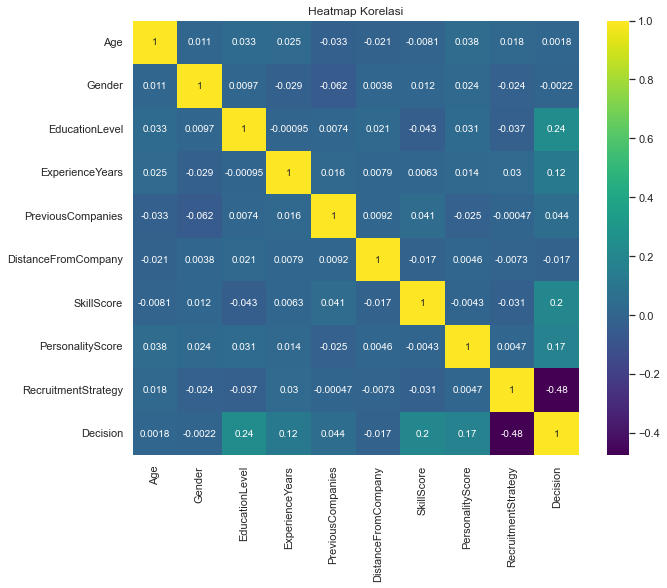

In [91]:
korelasi = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(korelasi, cmap='viridis', annot=True)
plt.title("Heatmap Korelasi")
plt.show()

## Feature Engineering 

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

In [93]:
# Splitting Data

X = df.drop('Decision', axis=1)
y = df['Decision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
print(X_train.shape, X_test.shape)

(1200, 9) (300, 9)


In [95]:
# Handling Imbalance Data

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [97]:
# Scaling Data

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


# **Modeling**

In [123]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay

In [114]:
log_reg = LogisticRegression()

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(log_reg, X_train_scaled, y_train_resampled, cv=kf, scoring='roc_auc')

# Menampilkan hasil K-Fold Cross Validation
print("K-Fold Cross Validation ROC_AUC Scores:")
print(cv_results)
print(f"Mean ROC_AUC Score: {cv_results.mean():.4f}")
print(f"Standard Deviation of ROC_AUC Score: {cv_results.std():.4f}")

K-Fold Cross Validation ROC_AUC Scores:
[0.91165197 0.91102435 0.90075115 0.89292088 0.92200298]
Mean ROC_AUC Score: 0.9077
Standard Deviation of ROC_AUC Score: 0.0100


In [115]:
# Menampilkan hasil K-Fold Cross Validation dalam bentuk tabel
cv_results_df = pd.DataFrame(cv_results, columns=["ROC_AUC"])
cv_results_df['Fold'] = range(1, len(cv_results) + 1)
cv_results_df.set_index('Fold', inplace=True)

# Menampilkan tabel hasil
print("\nK-Fold Cross Validation ROC_AUC Scores:")
cv_results_df



K-Fold Cross Validation ROC_AUC Scores:


,ROC_AUC
Fold,
1,0.911652
2,0.911024
3,0.900751
4,0.892921
5,0.922003


## Hyperparameter Tuning

In [118]:
# Melatih model menggunakan seluruh data train (resampled) setelah cross-validation
log_reg.fit(X_train_scaled, y_train_resampled)

# Hyperparameter tuning menggunakan GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Algoritma solver
}

# GridSearchCV untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_resampled)

# Menampilkan hasil terbaik dari GridSearchCV
print("\nBest Hyperparameters:")
print(grid_search.best_params_)
print("Best ROC_AUC Score:")
print(grid_search.best_score_)


Best Hyperparameters:
{'C': 1, 'solver': 'liblinear'}
Best ROC_AUC Score:
0.9060008923259965


# **Evaluation Metrics**

In [119]:
# Menggunakan model terbaik untuk prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Menampilkan classification report dan confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       215
           1       0.62      0.87      0.72        85

    accuracy                           0.81       300
   macro avg       0.78      0.83      0.79       300
weighted avg       0.85      0.81      0.82       300



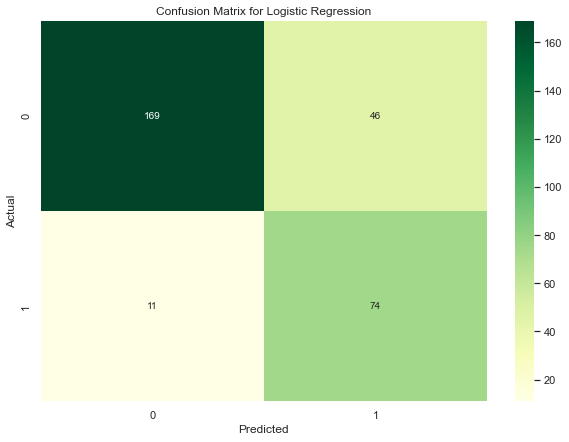

In [120]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGn')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

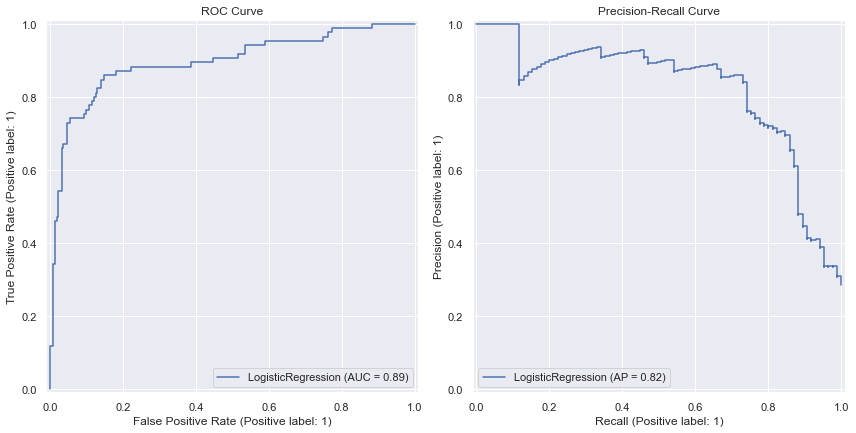

In [126]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

RocCurveDisplay.from_estimator(best_model, X_test_scaled, y_test, ax=ax1)
PrecisionRecallDisplay.from_estimator(best_model, X_test_scaled, y_test, ax=ax2)

ax1.set_title('ROC Curve')
ax2.set_title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

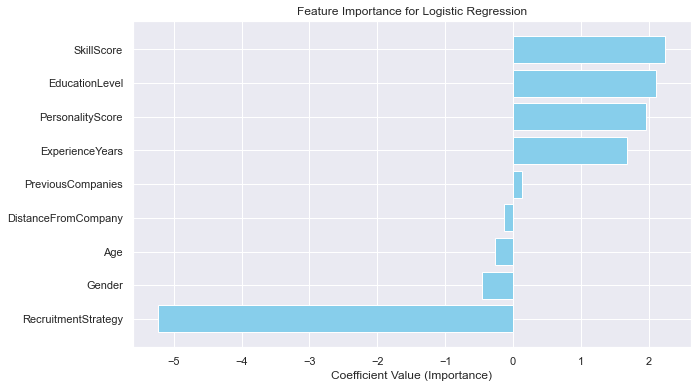

In [127]:
# Mendapatkan koefisien dari best_model (Logistic Regression)
feature_importance = best_model.coef_[0]

# Membuat DataFrame untuk memudahkan visualisasi
feature_names = X.columns  # Nama fitur dari dataset
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Mengurutkan fitur berdasarkan tingkat kepentingan
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualisasi Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Coefficient Value (Importance)')
plt.title('Feature Importance for Logistic Regression')
plt.gca().invert_yaxis()  # Membalikkan sumbu Y agar fitur dengan importance tertinggi di atas
plt.grid(True)
plt.show()

In [128]:
import joblib

# Menyimpan model Logistic Regression terbaik (best_model)
model_filename = 'best_logistic_regression_model.pkl'
joblib.dump(best_model, model_filename)

['best_logistic_regression_model.pkl']